Here we make a Singular value Decompoition of the Participant Input-Output Matrix

In [12]:
import numpy as np
import pandas as pd
import re
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
from matplotlib.pyplot import ylabel

get the dir

In [13]:
# the name of our directory
dname = os.path.dirname(os.getcwd()) + "/data_loading/data_v2_quotes/"
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts/data_loading/data_v2_quotes/'

Load our matrices of performance per trial and per block

In [14]:
in_out_matrix = np.load(dname + 'in_out_matrix.npy')
print(in_out_matrix.shape)

in_out_matrix_trialwise = np.load(dname + 'in_out_matrix_trialwise.npy')
print(in_out_matrix_trialwise.shape)


(7, 4, 8)
(7, 4, 128)


Perform the SVD

In [95]:
# u corresponds to left singular vectors, vt to right singular vectors, and s has singular values on the diagonal
test = in_out_matrix[:,:,7]
u, s, vt = np.linalg.svd(test, full_matrices=False)
s = np.diag(s)

# change the sign of singular vectors for comparability with saxe et al. 2019
u[:,[0,2,3]] *= -1
vt[[0,2,3], :] *= -1

print(in_out_matrix[:,:,7].shape)
print(u.shape, s.shape, vt.shape)
print(u)
print(s)

(7, 4)
(7, 4) (4, 4) (4, 4)
[[ 0.74124501  0.00068415  0.00360259  0.01673193]
 [ 0.3683103   0.57130852 -0.04538641 -0.04110428]
 [ 0.38441023 -0.55752055  0.05526535  0.04849516]
 [ 0.19896969  0.27502083  0.17641523 -0.71292963]
 [ 0.19471148  0.35358692 -0.12841999  0.6651008 ]
 [ 0.19784298 -0.24175537  0.6910083   0.15120146]
 [ 0.2246971  -0.32197999 -0.68539502 -0.14896003]]
[[2.59684843 0.         0.         0.        ]
 [0.         1.09444814 0.         0.        ]
 [0.         0.         0.64228568 0.        ]
 [0.         0.         0.         0.55565256]]


Make some code to plot our matrices

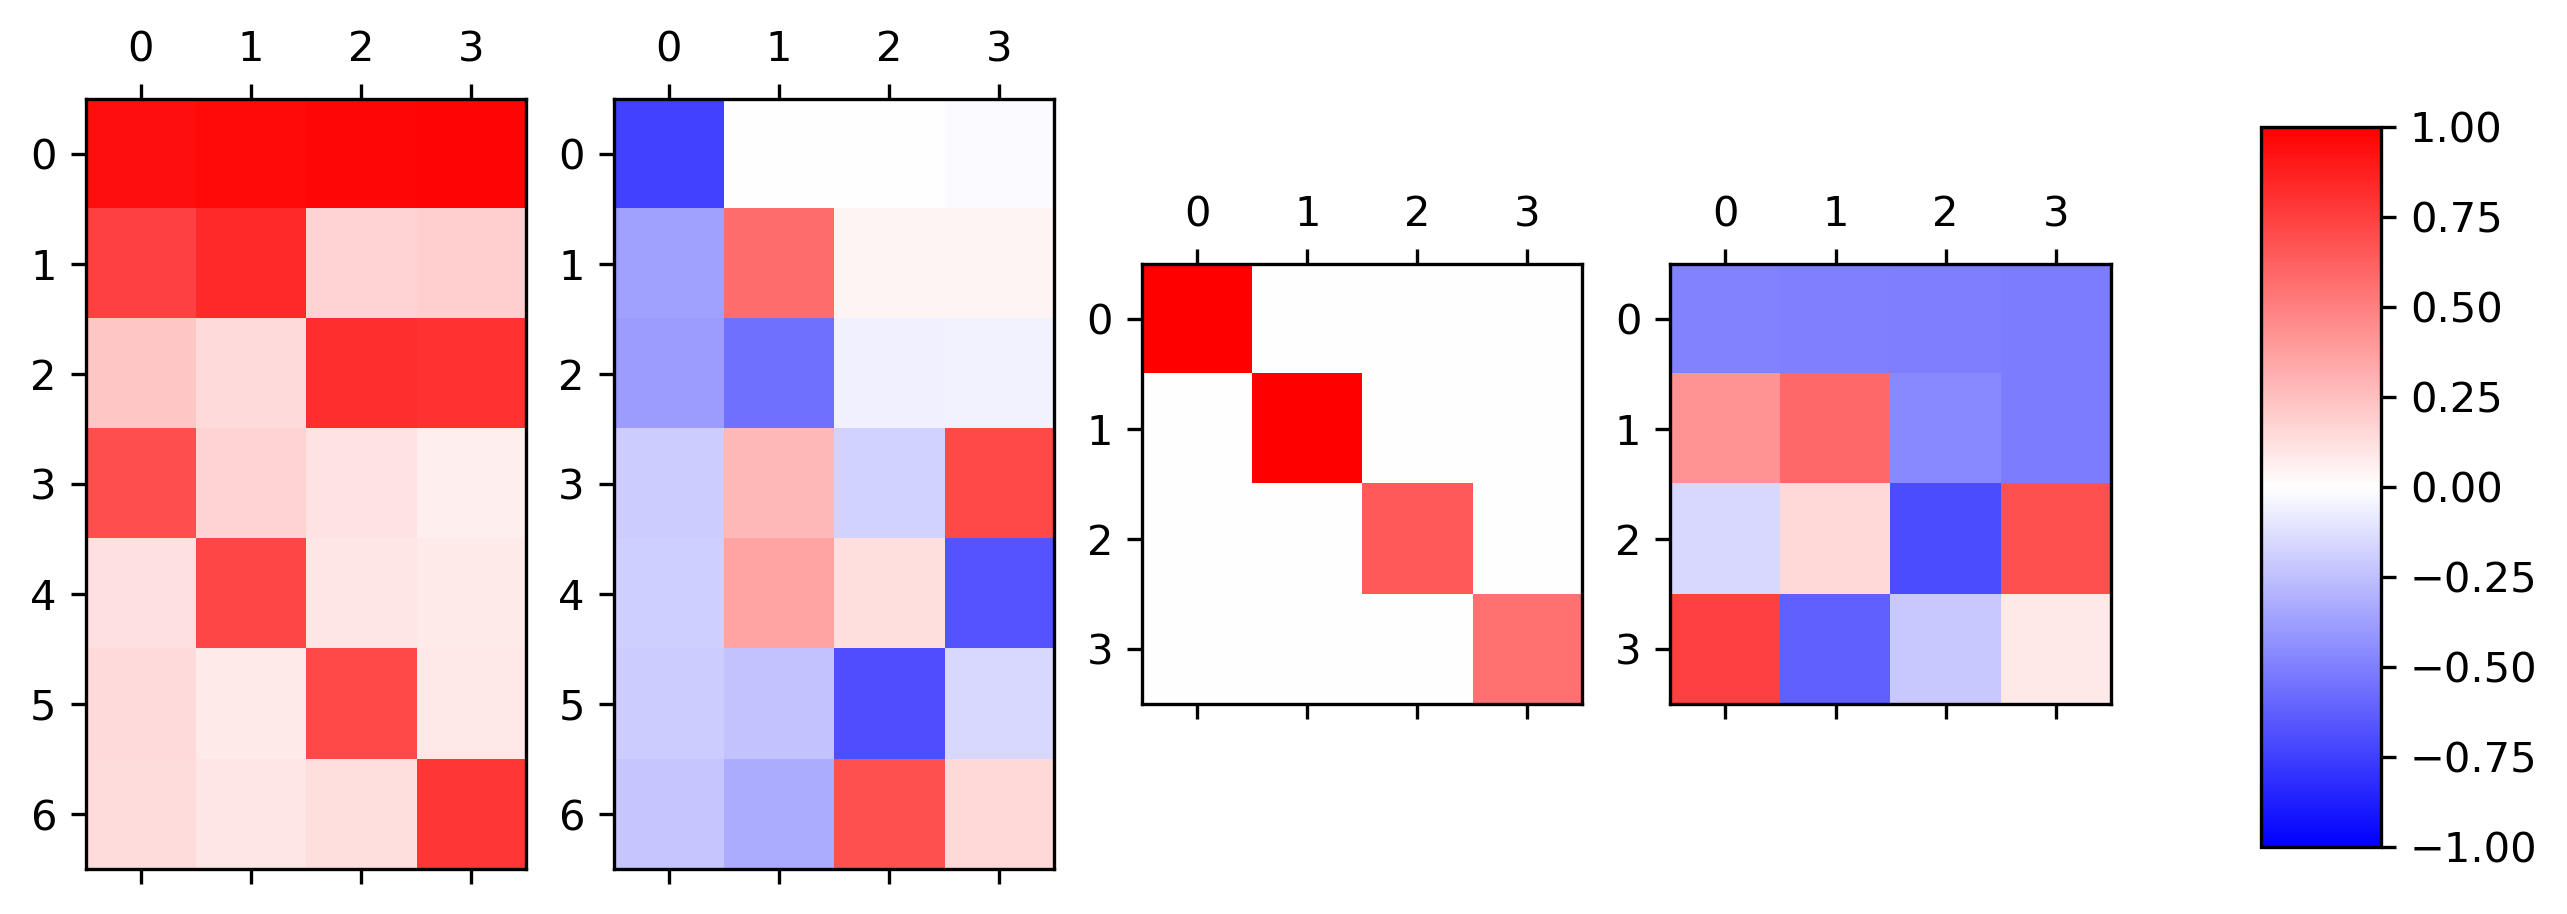

In [93]:
# custom function for the cmap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def plot_SVD(u, s, vt, in_out_matrix, fig_name, fig_title, unit_str, increment):
    # Define figure
    fig, axes = plt.subplots(1, 4, figsize=(10, 4), dpi=300, facecolor='w')
    cmap = plt.get_cmap('bwr')
    # cmap = truncate_colormap(cmap, 0, 1)

    # list of input, singular vectors and singular values for looping
    matrices = [in_out_matrix, u, s, vt]

    # Average per bloc
    for i, ax in enumerate(axes.flatten()):
        im = ax.matshow(matrices[i], cmap=cmap, vmin = -1, vmax = 1)

    # # remove the ticks and make tick labels
    # y_tick_labels = ['Derd','Lorp','Reng','Stad', 'Blap', 'Culp', 'Wost']
    # x_tick_labels = ['Class 1/2', 'Class 3/4', 'Class 5/6', 'Class 7/8']

    # for i, ax in enumerate(axes.flatten()):
        
    #     ax.set_title(unit_str + " " + str(i* increment+1), fontweight='bold', fontsize = 10)

    #     # make grid
    #     ax.set_xticks(np.arange(-.5, len(x_tick_labels)), minor=True)
    #     ax.set_yticks(np.arange(-.5, len(y_tick_labels)), minor=True)
    #     # Gridlines based on minor ticks
    #     ax.grid(which='minor', color='k', linestyle='-', linewidth=1)

    #     # remove ticks
    #     ax.tick_params(which='both', left=False, right=False, top=False, bottom=False, pad=1)

    #     ax.set_xticks(range(len(x_tick_labels)))
    #     ax.set_xticklabels(x_tick_labels, rotation= -45, fontsize=6, ha="left", rotation_mode="anchor")

    #     if i % 4 == 0:
    #         ax.set_ylabel("Properties",fontweight='bold', fontsize = 12)
    #         ax.set_yticks(range(len(y_tick_labels)))
    #         ax.set_yticklabels(y_tick_labels, fontsize=7)
    #         ax.tick_params(labeltop=False, labelbottom = True)

    #     else:
    #         ax.tick_params(labelleft=False, labeltop=False, labelbottom = True)

    # add a supertitle
    # fig.suptitle(fig_title, fontweight='bold', fontsize = 16)

    # add a colourbar
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.2, 0.04, 0.6])
    fig.colorbar(im, cax=cbar_ax)

# plt.tight_layout()

# fig.savefig(fig_name)

# print(os.getcwd())
plot_SVD(u, s, vt, test, 
                  'figure/in_out_matrix.svg', 
                  "Proportion of Participant Choices Across Blocks",
                  "Block",
                  1
                )

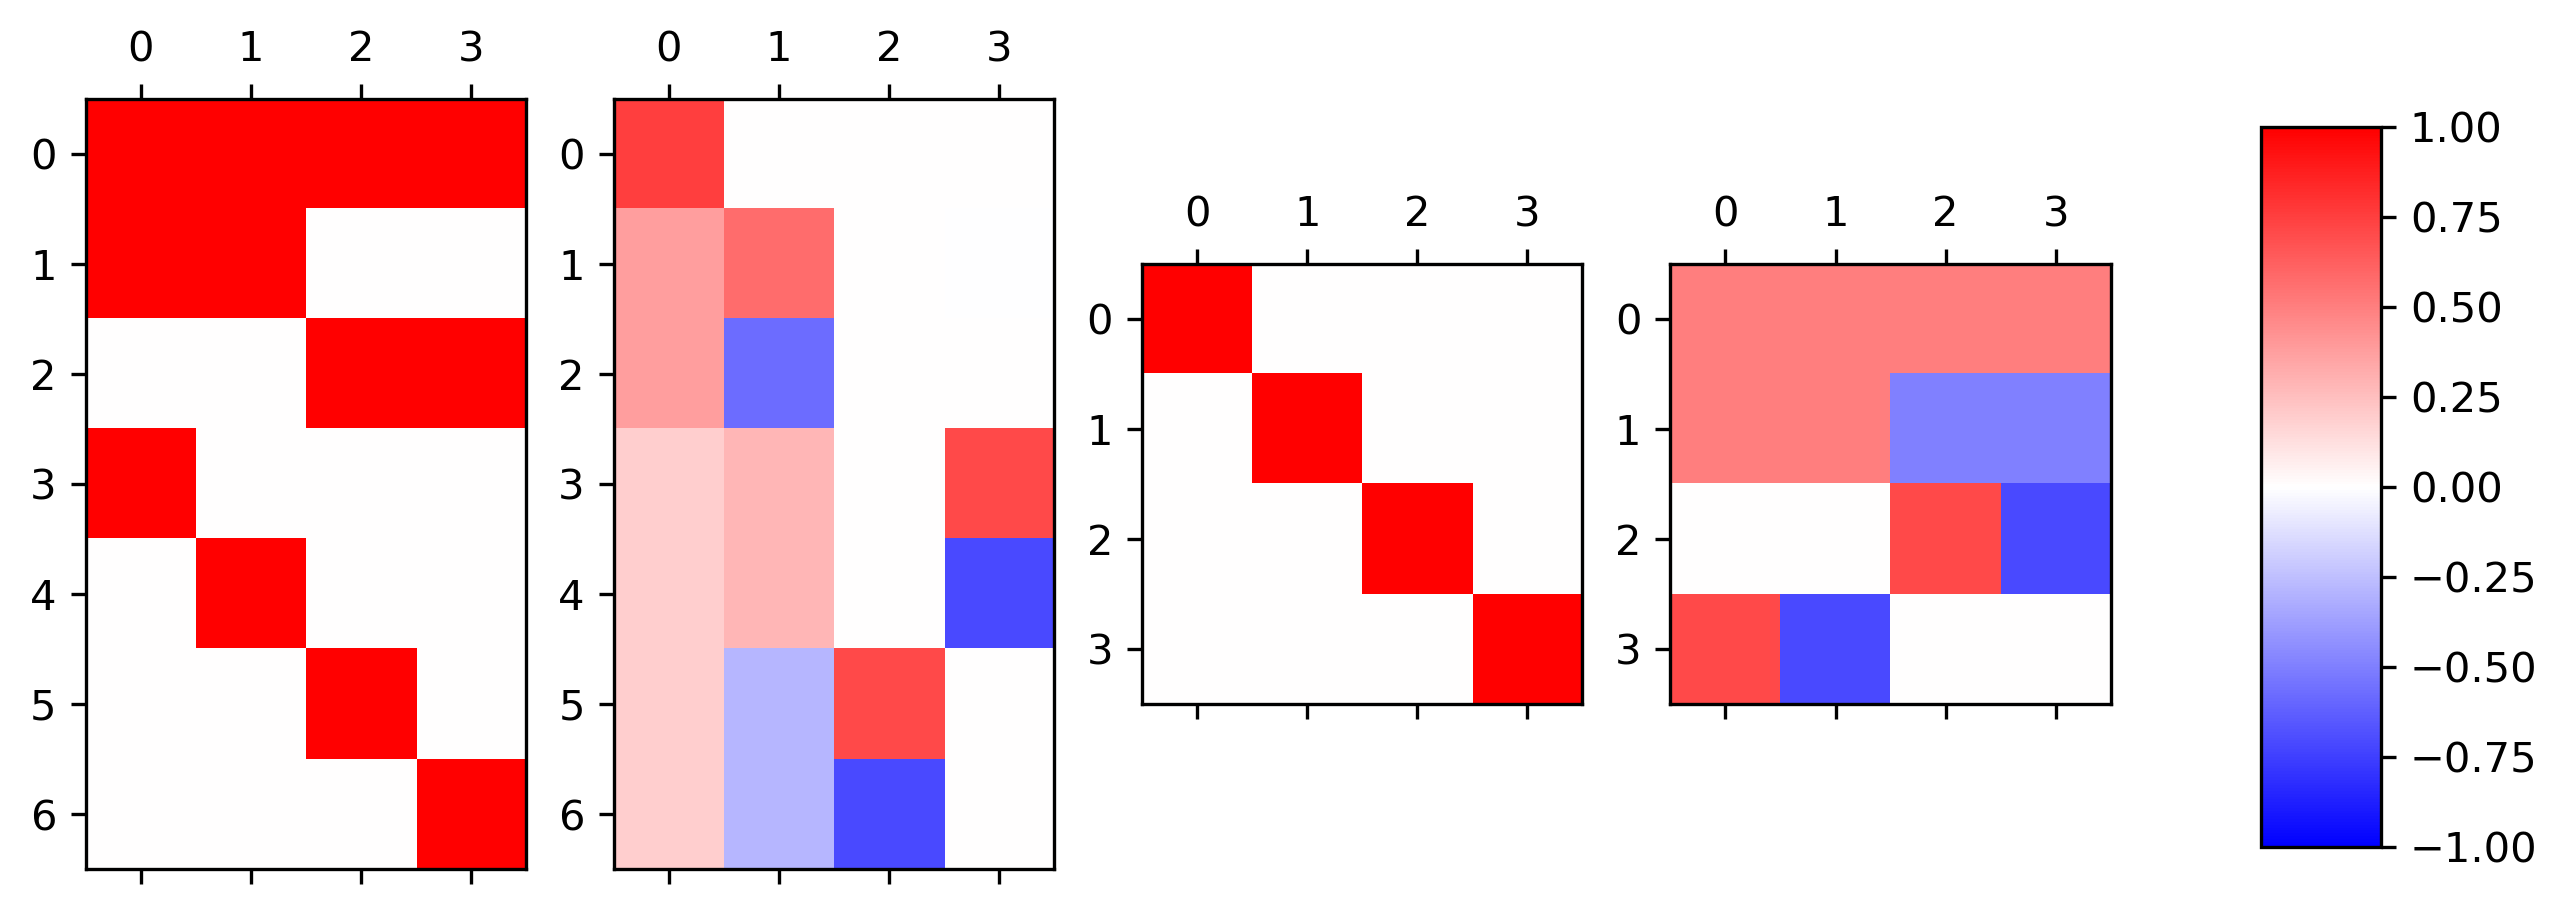

In [94]:
test = np.array([[1,1,1,1],[1,1,0,0], [0,0,1,1], [1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])

u, s, vt = np.linalg.svd(test, full_matrices=False)

# change the sign of singular vectors for comparability with saxe et al. 2019
u[:,[0,2,3]] *= -1
vt[[0,2,3], :] *= -1

s = np.diag(s)
np.set_printoptions(suppress=True)

plot_SVD(u, s, vt, test, 
                  'figure/in_out_matrix.svg', 
                  "Proportion of Participant Choices Across Blocks",
                  "Block",
                  1
                )

In [79]:
restored = np.dot(np.dot(u, s), vt)

restored
s

array([[2.64575131, 0.        , 0.        , 0.        ],
       [0.        , 1.73205081, 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])